# Practice 1 
#### By the end of this lesson you should know the steps to building a machine learning algorithm  by using a  logistic ML algorithm.

https://www.kaggle.com/code/samanyuk/lung-cancer-prediction-100-accuracy

# **Logistic regression** 
is a method for estimates the probability of a discrete outcome based on an input variable. The most frequent logistic regression models have a binary outcome, which might be true or false, yes or no, and so forth.

Pandas :  Pandas is an open-source library offering high-performance, easy-to-use data structures and analysis tools for Python.

numpy : NumPy is a Python library for efficient scientific computing, offering multidimensional arrays and fast operations like math, statistics, and 
linear algebra.


 matplotlib.pyplot : matplotlib.pyplot is a module for creating customizable static and interactive visualizations in Python.

 seaborn : seaborn is a Python library for making attractive statistical visualizations, built on top of Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here it is Dataset called  
# Cancer Patient Data 

In [2]:
cancer=pd.read_csv("cancer patient data sets.csv")
cancer.head(20)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

The information shows that we have some records that will not help us.  Before continuing with the message, consider what you want to keep and what you want to get rid of.

In [4]:
cancer.drop('Patient Id',axis=1,inplace=True)
cancer.drop('Dust Allergy',axis=1,inplace=True)
cancer.drop('OccuPational Hazards',axis=1,inplace=True)
cancer.drop('Smoking',axis=1,inplace=True)
cancer.drop('Wheezing',axis=1,inplace=True)
cancer.drop('Clubbing of Finger Nails',axis=1,inplace=True)
cancer.drop('Frequent Cold',axis=1,inplace=True)
cancer.drop('Snoring',axis=1,inplace=True)




In [5]:
cancer.head(20)

,index,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Swallowing Difficulty,Dry Cough,Level
0,0,33,1,2,4,3,2,2,4,2,2,4,3,4,2,3,3,Low
1,1,17,1,3,1,4,2,2,2,4,2,3,1,3,7,6,7,Medium
2,2,35,1,4,5,5,4,6,7,3,4,8,8,7,9,1,7,High
3,3,37,1,7,7,6,7,7,7,7,7,8,4,2,3,4,7,High
4,4,46,1,6,8,7,6,7,7,7,7,9,3,2,4,4,2,High
5,5,35,1,4,5,5,4,6,7,3,4,8,8,7,9,1,7,High
6,6,52,2,2,4,3,2,2,4,2,2,4,3,4,2,3,3,Low
7,7,28,2,3,1,2,3,4,3,4,3,1,3,2,2,2,4,Low
8,8,35,2,4,5,6,5,5,5,6,6,5,1,4,3,4,4,Medium
9,9,46,1,2,3,4,3,3,3,3,4,4,1,2,4,5,1,Medium


Now, we're going to replace the object into to int.

In [6]:

cancer.replace('Low',0,inplace=True)
cancer.replace('Medium',1,inplace=True)
cancer.replace('High',2,inplace=True)

C:\Users\shree\AppData\Local\Temp\ipykernel_20968\497263221.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer.replace('High',2,inplace=True)


In [7]:
cancer.head()

,index,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Swallowing Difficulty,Dry Cough,Level
0,0,33,1,2,4,3,2,2,4,2,2,4,3,4,2,3,3,0
1,1,17,1,3,1,4,2,2,2,4,2,3,1,3,7,6,7,1
2,2,35,1,4,5,5,4,6,7,3,4,8,8,7,9,1,7,2
3,3,37,1,7,7,6,7,7,7,7,7,8,4,2,3,4,7,2
4,4,46,1,6,8,7,6,7,7,7,7,9,3,2,4,4,2,2


### Choosing a Model
In many cases, we want to select the model that best matches our data. 
Now , we have a set of x variables . So based on this we want to make a prediction y.
As we change values of x, values of y should change.  Let's try to map some x against y.

In [8]:
X,y = cancer.drop('Level',axis=1),cancer['Level'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X, y, test_size=0.3, random_state=87)

### Training the Model
Our data must now be divided into training and testing sets.Sometimes we will have our training and testing data in 2 separate files.  

In [10]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

c:\Users\shree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [11]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

#Print the classification report for the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        92
           1       0.85      0.89      0.87        95
           2       0.93      0.99      0.96       113

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### Evaluating the Model
Let's test the model now that it has been trained.  To what extent is it accurate?

In [12]:
predictions = logmodel.predict( X_test)
logmodel.score(X_test, y_test)

0.8933333333333333

 3 relevant graphs to your data

<Axes: xlabel='Gender', ylabel='Level'>

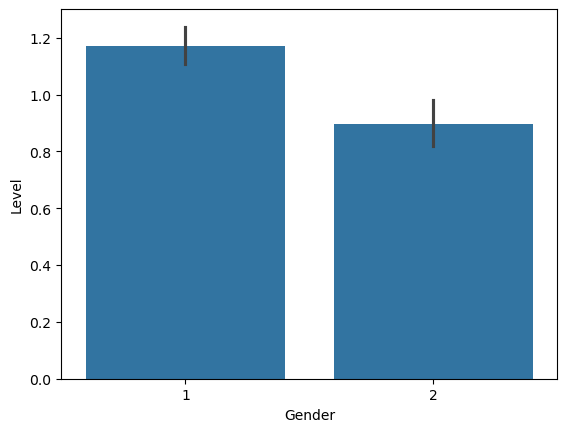

In [13]:
sns.barplot(x='Gender',y='Level',data=cancer)

<Axes: xlabel='Passive Smoker', ylabel='Level'>

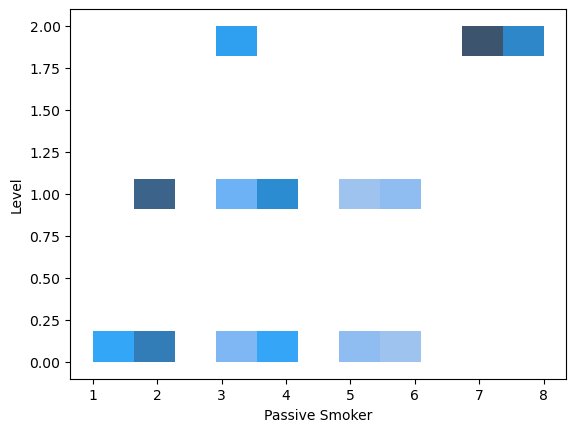

In [14]:
sns.histplot(x='Passive Smoker', y= 'Level', data=cancer)

<Axes: xlabel='Air Pollution', ylabel='Level'>

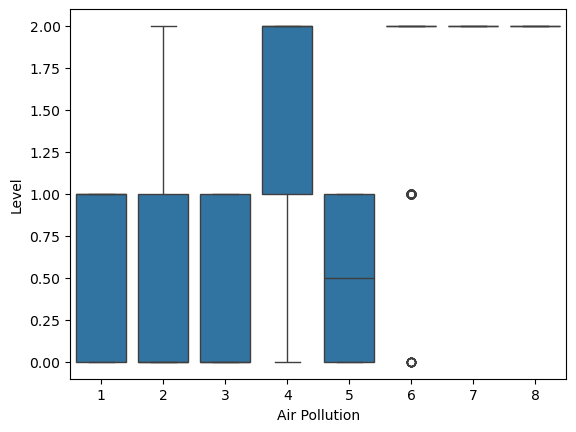

In [15]:
sns.boxplot(x='Air Pollution',y='Level',data=cancer)

### Making Predictions
At this point we need to use our model to make a prediction.

In [16]:
myTest = {
    'index': [2],
    'Age': [100],  
    'Gender': [1],  
    'Air Pollution': [3], 
    'Alcohol use': [3],  
    'Genetic Risk': [12],
    'chronic Lung Disease': [3],
    'Balanced Diet': [3],
    'Obesity':[4],
    'Passive Smoker' :[4],           
    'Chest Pain':[7],               
    'Coughing of Blood':[1],
    'Fatigue': [2],  
    'Weight Loss': [1],
    'Shortness of Breath': [2],  
    'Swallowing Difficulty': [2],
    'Dry Cough':[3],
    
    
}
cancer= pd.DataFrame(myTest)
print(logmodel.predict(cancer))



[1]
